In [1]:
#mount drive to access local files
from google.colab import drive
drive.mount('/content/drive') 

MessageError: ignored

In [ ]:
#import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#ML models
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [ ]:
#import dataframe
PATH = '/content/drive/MyDrive/AJ Drive/GRAD SCHOOL (UMD)/Spring 22/2022 Capstone Shared/HSI Data/'

file_name = '10312022_glucose_signals.csv'
df = pd.read_csv(PATH+file_name, parse_dates=['date'])

In [ ]:
df.columns

Index(['image_id', 'Unnamed: 1', 'date', 'image_id.1', 'column',
       'glucose_mg_dl', 'path', '1206.69', '1216.27', '1225.85',
       ...
       '2308.35', '2317.93', '2327.51', '2337.09', '2346.67', '2356.25',
       '2365.83', '2375.41', '2384.98', '2394.56'],
      dtype='object', length=132)

In [ ]:
df['glucose_mg_dl'].unique()

array([  0,  40,  80, 120, 160, 200, 240, 280, 320, 360, 400, 100, 300])

In [ ]:
#pick bands of interest
b = df.columns[7:-1].to_list()#[6:].to_list()
wl = np.array([float(x) for x in b])
b_crop = np.array(b)[(wl<1860) & (wl>0)]

In [ ]:
#pick min and max concantration
min_conc = df['glucose_mg_dl'].min()
max_conc = df['glucose_mg_dl'].max()
df_ml = df[(df['glucose_mg_dl'] > min_conc) & (df['glucose_mg_dl'] < max_conc)].copy()

In [ ]:
# #pick concentrations for train vs test set, probably better to do an even sampling as demonstrated
# bin_labels = np.linspace(min_conc,max_conc,10)
# df_ml['bin'] = pd.cut(df_ml['glucose_mg_dl'], bins=bin_labels, labels=np.arange(bin_labels.shape[0]-1), include_lowest=False).astype(np.int64)

In [ ]:
# bin_list = np.sort(df_ml['bin'].unique())
# print(bin_list)

[0 1 2 3 4 5 6 7 8]


In [ ]:
glucose_train = df['glucose_mg_dl'].unique()[1:-2]
glucose_test = df['glucose_mg_dl'].unique()[-2:]#bin_list[1:-1:2]

In [ ]:
print(glucose_train)
print(glucose_test)

[ 40  80 120 160 200 240 280 320 360 400]
[100 300]


In [ ]:
#get dataset from dataframe: it should be pre-grouped based on the time of the image
X_train, y_train = df.set_index('glucose_mg_dl').loc[(glucose_train),b_crop].to_numpy(), df.set_index('glucose_mg_dl').loc[(glucose_train),:].index.to_numpy()
X_test, y_test = df.set_index('glucose_mg_dl').loc[(glucose_test),b_crop].to_numpy(), df.set_index('glucose_mg_dl').loc[(glucose_test),:].index.to_numpy()

#X_test, y_test = df_ml.set_index('glucose_mg_dl').loc[(glucose_test),b_crop].to_numpy(), df_ml.set_index('glucose_mg_dl').loc[(glucose_test),:].index.to_numpy()

In [ ]:
print(X_train.shape, b_crop.shape)

(2518, 69) (69,)


In [ ]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
y_pred = reg.predict(X_test)

0.9981500380495145
-10.05427588014233


0.9911832990978295
-4.808553926795767


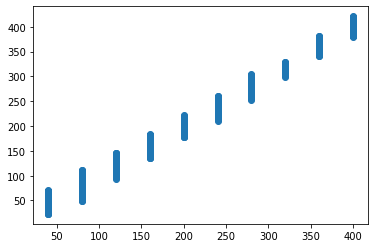

In [ ]:
pls2 = PLSRegression(n_components=10)
pls2.fit(X_train, y_train)
print(pls2.score(X_train, y_train))
print(pls2.score(X_test, y_test))
y_pred = pls2.predict(X_train)
plt.scatter(y_train, y_pred[:,0])
# plt.scatter(X_test[:,0], X_test[:,1], c=y_test)